In [1]:
import numpy as np
from mlgrad.avragg import Average_FG, AdaM2, AdaM1
from mlgrad.func import Quantile, Expectile, Quantile_AlphaLog
import matplotlib.pyplot as plt

import seaborn

#%matplotlib inline
%config BackendInline.format='svg'

In [2]:
X = np.random.random((1000,))

In [11]:
vs = []
ss = []
ks1 = []
ks2 = []
alphas = np.linspace(0.05, 0.95, 200)
m = len(alphas)
for alpha in alphas:
    func = Quantile_AlphaLog(0.001, alpha)
    alg = Average_FG(func, h=0.001)
    alg.fit_u(X)
    ks1.append(alg.K)
    alg.fit_sigma(X, alg.y)
    ks2.append(alg.K)
    vs.append(alg.y)
    ss.append(alg.sigma)


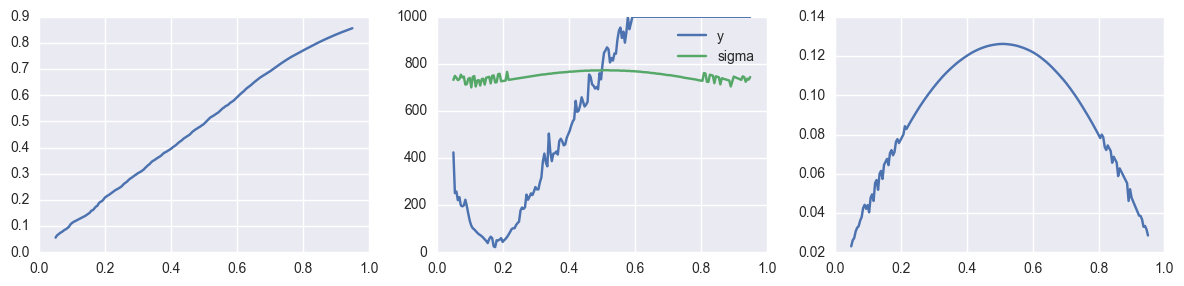

In [12]:
plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.plot(alphas, vs)
plt.xlim(0., 1.)
plt.subplot(1, 3, 2)
plt.plot(alphas, ks1, label='y')
plt.plot(alphas, ks2, label='sigma')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(alphas, ss)
plt.tight_layout()
plt.show()

In [13]:
vs = []
ss = []
ks1 = []
ks2 = []
alphas = np.linspace(0.05, 0.95, 200)
m = len(alphas)
for alpha in alphas:
    func = Expectile(alpha)
    alg = Average_FG(func, h=0.001)
    alg.fit_u(X)
    ks1.append(alg.K)
    alg.fit_sigma(X, alg.y, 1.)
    ks2.append(alg.K)
    vs.append(alg.y)
    ss.append(alg.sigma)


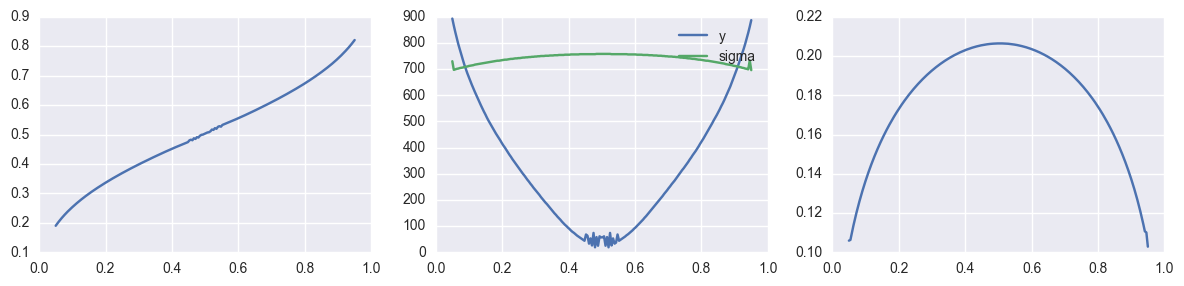

In [10]:
plt.figure(figsize=(12,3))
plt.subplot(1, 3, 1)
plt.plot(alphas, vs)
plt.subplot(1, 3, 2)
plt.plot(alphas, ks1, label='y')
plt.plot(alphas, ks2, label='sigma')
plt.legend()
plt.subplot(1, 3, 3)
plt.plot(alphas, ss)
plt.tight_layout()
plt.show()